In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('shared_data_read_only/Education-Data/SDP_Graduation_Rates_School_S_2023-02-15.csv')

In [3]:
display(data)

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
0,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,All Students,All Students,281,203,72.24
1,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,211,153,72.51
2,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,70,50,71.43
3,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,ELL,EL,37,24,64.86
4,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,ELL,Non-EL,244,179,73.36
...,...,...,...,...,...,...,...,...,...,...
26158,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Ethnicity,White,1,s,s
26159,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Gender,Female,16,s,s
26160,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Gender,Male,5,s,s
26161,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,IEP,Does Not Have IEP,18,s,s


In [4]:
filter_race = data[(data['group'] == 'Ethnicity') | (data['group'] == 'Economically Disadvantaged')]

In [5]:
display(filter_race)

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
1,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,211,153,72.51
2,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,70,50,71.43
5,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Ethnicity,Asian,13,10,76.92
6,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Ethnicity,Black/African American,253,182,71.94
7,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Ethnicity,Hispanic/Latino,6,s,s
...,...,...,...,...,...,...,...,...,...,...
26153,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,16,s,s
26154,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,5,s,s
26156,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Ethnicity,Black/African American,10,s,s
26157,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Ethnicity,Hispanic/Latino,10,s,s


In [6]:
race = filter_race[filter_race['subgroup'] != 'White']

In [7]:
display(race)

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
1,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,211,153,72.51
2,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,70,50,71.43
5,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Ethnicity,Asian,13,10,76.92
6,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Ethnicity,Black/African American,253,182,71.94
7,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Ethnicity,Hispanic/Latino,6,s,s
...,...,...,...,...,...,...,...,...,...,...
26146,2018-2019,8890,One Bright Ray - Simpson Campus,Alternative,4-Year Graduation Rate,Ethnicity,Hispanic/Latino,63,8,12.7
26153,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,16,s,s
26154,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,5,s,s
26156,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Ethnicity,Black/African American,10,s,s


In [8]:
non_s = race.replace('s', pd.NA, inplace=True)
cleaned_data = race.dropna()


/tmp/ipykernel_30033/1859908343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_s = race.replace('s', pd.NA, inplace=True)


In [9]:
display(cleaned_data)

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
1,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,211,153,72.51
2,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,70,50,71.43
5,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Ethnicity,Asian,13,10,76.92
6,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Ethnicity,Black/African American,253,182,71.94
15,2010-2011,1010,John Bartram High School,District,5-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,206,159,77.18
...,...,...,...,...,...,...,...,...,...,...
26134,2018-2019,8870,One Bright Ray Mansion Evening,Alternative,4-Year Graduation Rate,Ethnicity,Black/African American,66,26,39.39
26135,2018-2019,8870,One Bright Ray Mansion Evening,Alternative,4-Year Graduation Rate,Ethnicity,Hispanic/Latino,14,8,57.14
26141,2018-2019,8890,One Bright Ray - Simpson Campus,Alternative,4-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,44,4,9.09
26142,2018-2019,8890,One Bright Ray - Simpson Campus,Alternative,4-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,57,7,12.28


In [10]:

cleaned_data['score'] = cleaned_data['score'].astype(float)

filter_grad = cleaned_data[cleaned_data['score'] <= 50.00]
display(filter_grad)

/tmp/ipykernel_30033/2462838259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['score'] = cleaned_data['score'].astype(float)


,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
341,2010-2011,2010,Benjamin Franklin High School,District,4-Year Graduation Rate,Ethnicity,Asian,14,7,50.00
604,2010-2011,2310,Achieve Academy,Alternative,4-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,52,22,42.31
605,2010-2011,2310,Achieve Academy,Alternative,4-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,21,6,28.57
609,2010-2011,2310,Achieve Academy,Alternative,4-Year Graduation Rate,Ethnicity,Black/African American,65,26,40.00
616,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,53,22,41.51
...,...,...,...,...,...,...,...,...,...,...
26124,2018-2019,8860,One Bright Ray Mansion,Alternative,4-Year Graduation Rate,Ethnicity,Black/African American,45,5,11.11
26134,2018-2019,8870,One Bright Ray Mansion Evening,Alternative,4-Year Graduation Rate,Ethnicity,Black/African American,66,26,39.39
26141,2018-2019,8890,One Bright Ray - Simpson Campus,Alternative,4-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,44,4,9.09
26142,2018-2019,8890,One Bright Ray - Simpson Campus,Alternative,4-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,57,7,12.28


In [11]:
rate = filter_grad[filter_grad['rate_type'] != '4-Year Graduation Rate']

In [12]:
display(rate)


,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
616,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,53,22,41.51
617,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,19,7,36.84
621,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,Ethnicity,Black/African American,64,27,42.19
628,2010-2011,2310,Achieve Academy,Alternative,6-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,52,22,42.31
629,2010-2011,2310,Achieve Academy,Alternative,6-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,19,7,36.84
...,...,...,...,...,...,...,...,...,...,...
25085,2017-2018,8870,One Bright Ray Mansion Evening,Alternative,5-Year Graduation Rate,Ethnicity,Black/African American,29,13,44.83
25106,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,73,18,24.66
25107,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,93,27,29.03
25110,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,Ethnicity,Black/African American,57,12,21.05


In [13]:
alternative = rate[rate['sector'] == 'Alternative']
display(alternative)

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
616,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,53,22,41.51
617,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,19,7,36.84
621,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,Ethnicity,Black/African American,64,27,42.19
628,2010-2011,2310,Achieve Academy,Alternative,6-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,52,22,42.31
629,2010-2011,2310,Achieve Academy,Alternative,6-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,19,7,36.84
...,...,...,...,...,...,...,...,...,...,...
25085,2017-2018,8870,One Bright Ray Mansion Evening,Alternative,5-Year Graduation Rate,Ethnicity,Black/African American,29,13,44.83
25106,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,73,18,24.66
25107,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,93,27,29.03
25110,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,Ethnicity,Black/African American,57,12,21.05


In [15]:
cleaned_data = alternative[alternative['score'] != 's']
cleaned_data['score'] = cleaned_data['score'].astype(float)t
X_scaled = scaler.fit_transform(X)
# k = 5
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_data['cluster'] = kmeans.fit_predict(X_scaled)

display(cleaned_data)

/opt/tljh/user/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score,cluster
616,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,53,22,41.51,0
617,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,19,7,36.84,0
621,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,Ethnicity,Black/African American,64,27,42.19,1
628,2010-2011,2310,Achieve Academy,Alternative,6-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,52,22,42.31,0
629,2010-2011,2310,Achieve Academy,Alternative,6-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,19,7,36.84,0
...,...,...,...,...,...,...,...,...,...,...,...
25085,2017-2018,8870,One Bright Ray Mansion Evening,Alternative,5-Year Graduation Rate,Ethnicity,Black/African American,29,13,44.83,0
25106,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,73,18,24.66,2
25107,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,93,27,29.03,1
25110,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,Ethnicity,Black/African American,57,12,21.05,2


In [18]:
old_values = 'Economically Disadvantaged' 
new_value = 4
o_value = 'Ethnicity'
n_value = 5

# Replace 'A' and 'B' with 'X', ignoring all other values
cleaned_data['group'] = cleaned_data['group'].replace(old_values, new_value)
cleaned_data['group'] = cleaned_data['group'].replace(o_value, n_value)
display(cleaned_data)

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score,cluster
616,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,4,Economically Disadvantaged,53,22,41.51,0
617,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,4,Not Economically Disadvantaged,19,7,36.84,0
621,2010-2011,2310,Achieve Academy,Alternative,5-Year Graduation Rate,5,Black/African American,64,27,42.19,1
628,2010-2011,2310,Achieve Academy,Alternative,6-Year Graduation Rate,4,Economically Disadvantaged,52,22,42.31,0
629,2010-2011,2310,Achieve Academy,Alternative,6-Year Graduation Rate,4,Not Economically Disadvantaged,19,7,36.84,0
...,...,...,...,...,...,...,...,...,...,...,...
25085,2017-2018,8870,One Bright Ray Mansion Evening,Alternative,5-Year Graduation Rate,5,Black/African American,29,13,44.83,0
25106,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,4,Economically Disadvantaged,73,18,24.66,2
25107,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,4,Not Economically Disadvantaged,93,27,29.03,1
25110,2017-2018,8890,One Bright Ray - Simpson Campus,Alternative,5-Year Graduation Rate,5,Black/African American,57,12,21.05,2


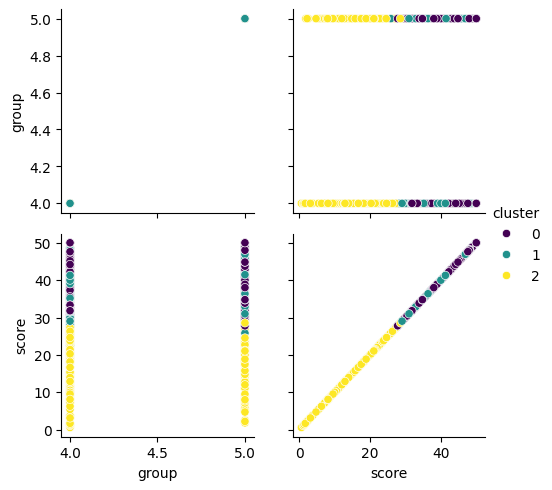

In [21]:
g = sns.PairGrid(cleaned_data[["group","score","cluster"]],hue="cluster", palette = "viridis")
g.map(sns.scatterplot)
g.add_legend()




# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cleaned_data['cluster'], cmap='viridis')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('K-means Clustering')
# plt.colorbar()
# plt.show()

In [17]:
X_scaled

array([[ 0.01387821,  0.31768619,  0.71503947],
       [-0.98593554, -0.77162633,  0.34387733],
       [ 0.33734737,  0.68079037,  0.76908449],
       ...,
       [ 1.19012968,  0.68079037, -0.27684566],
       [ 0.13150336, -0.40852216, -0.9110799 ],
       [ 1.39597369,  0.97127371, -0.12027405]])